Research Question: How can building permit trends help us forecast future urban growth in specific neighborhoods?

Members: Shuteng O, Max V, Jessica G, Schadrack K

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import nbinom, linregress, probplot, lognorm
import scipy.stats as stats
import numpy as np

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Building_Permits.csv")

<ipython-input-3-178304c1e011>:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Building_Permits.csv")


In [ ]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


# Inspecting Data

In [ ]:
df.shape

(198900, 43)

In [ ]:
# how many unknown data cells by columns
df.isna().sum()

,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Number Suffix,196684
Street Name,0
Street Suffix,2768


In [ ]:
# list the column names
df.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     

In [ ]:
# inspecting data types
df.dtypes

,0
Permit Number,object
Permit Type,int64
Permit Type Definition,object
Permit Creation Date,object
Block,object
Lot,object
Street Number,int64
Street Number Suffix,object
Street Name,object
Street Suffix,object


# Data Cleaning

## Remove Duplicates, Remove Unnecessary Columns, Clean Names, Fix Timeline, Combine Addresses

Remove duplicated rows that have the same ID Number

In [ ]:
df = df.drop_duplicates(subset=['Permit Number'], keep='first').reset_index(drop=True)

Remove irrelevant columns data + columns with NAs (permit number, unit, site permit, TIDF compliance, street number suffix, unit suffix, block, lot, structural notification, record id)

In [ ]:
df.drop(['Permit Number', 'Site Permit', 'TIDF Compliance',
        'Street Number Suffix', 'Unit Suffix', 'Unit', 'Block', 'Lot',
         'Structural Notification', 'Record ID'], axis = 1, inplace =True)

In [ ]:
# check work
df.head()

,Permit Type,Permit Type Definition,Permit Creation Date,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,...,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
0,4,sign - erect,05/06/2015,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,...,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)"
1,4,sign - erect,04/19/2016,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)"
2,3,additions alterations or repairs,05/27/2016,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,...,39.0,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)"
3,8,otc alterations permit,11/07/2016,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)"
4,6,demolitions,11/28/2016,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,...,NaN,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)"


Rename columns to remove whitespace and replace space with underscores

In [ ]:
# replace spaces with underscores

df.columns = df.columns.str.replace(' ', '_')

# make the column names lowercase
# str.lower converts string to lowercase
# map makes sure to apply the function to each item

df.columns = map(str.lower, df.columns)

#just in case: remove trailing and leading whitespace
df.columns = df.columns.str.strip()

#sanity check
df.columns

Index(['permit_type', 'permit_type_definition', 'permit_creation_date',
       'street_number', 'street_name', 'street_suffix', 'description',
       'current_status', 'current_status_date', 'filed_date', 'issued_date',
       'completed_date', 'first_construction_document_date',
       'number_of_existing_stories', 'number_of_proposed_stories',
       'voluntary_soft-story_retrofit', 'fire_only_permit',
       'permit_expiration_date', 'estimated_cost', 'revised_cost',
       'existing_use', 'existing_units', 'proposed_use', 'proposed_units',
       'plansets', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'supervisor_district',
       'neighborhoods_-_analysis_boundaries', 'zipcode', 'location'],
      dtype='object')

Trim the timeline to account for only full years worth of data: Jan 1, 2013 - Dec 31, 2017

In [ ]:
# Convert permit_creation_date to datetime
df['permit_creation_date'] = pd.to_datetime(df['permit_creation_date'], errors='coerce')

# Start and end dates
start_date = pd.to_datetime('01/01/2013')
end_date = pd.to_datetime('12/31/2017')

# Include only rows within designated time range
df = df[(df['permit_creation_date'] >= start_date) & (df['permit_creation_date'] <= end_date)]

# Display the first few rows
df.head()


,permit_type,permit_type_definition,permit_creation_date,street_number,street_name,street_suffix,description,current_status,current_status_date,filed_date,...,proposed_units,plansets,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location
0,4,sign - erect,2015-05-06,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,...,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)"
1,4,sign - erect,2016-04-19,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)"
2,3,additions alterations or repairs,2016-05-27,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,...,39.0,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)"
3,8,otc alterations permit,2016-11-07,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)"
4,6,demolitions,2016-11-28,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,...,NaN,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)"


Check if dates are right

In [ ]:
df['permit_creation_date'].max()

Timestamp('2017-12-29 00:00:00')

In [ ]:
df['permit_creation_date'].min()

Timestamp('2013-01-02 00:00:00')

In [ ]:
df.head()

,permit_type,permit_type_definition,permit_creation_date,street_number,street_name,street_suffix,description,current_status,current_status_date,filed_date,...,proposed_units,plansets,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location
0,4,sign - erect,2015-05-06,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,...,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)"
1,4,sign - erect,2016-04-19,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)"
2,3,additions alterations or repairs,2016-05-27,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,...,39.0,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)"
3,8,otc alterations permit,2016-11-07,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)"
4,6,demolitions,2016-11-28,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,...,NaN,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)"


In [ ]:
len(df)

175993

Combine columns to make up an address

In [ ]:
df['address'] = df['street_number'].astype(str) + ' ' + df['street_name'].astype(str) + ' ' + df['street_suffix'].astype(str)

df.head()

,permit_type,permit_type_definition,permit_creation_date,street_number,street_name,street_suffix,description,current_status,current_status_date,filed_date,...,plansets,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,address
0,4,sign - erect,2015-05-06,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",140 Ellis St
1,4,sign - erect,2016-04-19,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",440 Geary St
2,3,additions alterations or repairs,2016-05-27,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1647 Pacific Av
3,8,otc alterations permit,2016-11-07,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1230 Pacific Av
4,6,demolitions,2016-11-28,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",950 Market St


## Group existing and proposed classes

In [ ]:
# look at existing use columns
df['existing_use'].unique()

array(['tourist hotel/motel', 'retail sales', '1 family dwelling',
       'apartments', nan, '2 family dwelling', 'church', 'storage shed',
       'office', 'vacant lot', 'food/beverage hndlng',
       'residential hotel', 'filling/service stn', 'workshop commercial',
       'clinics-medic/dental', 'misc group residns.', 'hospital', 'club',
       'barber/beauty salon', 'warehouse,no frnitur', 'school',
       'artist live/work', 'manufacturing', 'garment shops',
       'public assmbly other', 'auto repairs', 'lending institution',
       'museum', 'warehouse, furniture', 'prkng garage/private',
       'antenna', 'health studios & gym', 'massage parlor',
       'printing plant', 'parking lot', 'workshop residential',
       'power plant', 'tower', 'mortuary', 'animal sale or care',
       'laundry/laundromat', 'nite club', 'paint store',
       'recreation bldg', 'theater', 'prkng garage/public', 'sign',
       'phone xchnge/equip', 'dance hall', 'sfpd or sffd station',
       'storage

In [ ]:
df['proposed_use'].unique()

array([nan, 'retail sales', '1 family dwelling', 'apartments',
       '2 family dwelling', 'church', 'vacant lot', 'office',
       'tourist hotel/motel', 'school', 'filling/service stn',
       'food/beverage hndlng', 'residential hotel', 'storage shed',
       'clinics-medic/dental', 'misc group residns.', 'club', 'hospital',
       'barber/beauty salon', 'warehouse,no frnitur', 'artist live/work',
       'museum', 'lending institution', 'garment shops', 'child care',
       'auto repairs', 'manufacturing', 'day care home lt 7',
       'workshop commercial', 'warehouse, furniture',
       'prkng garage/private', 'antenna', 'health studios & gym',
       'massage parlor', 'printing plant', 'parking lot',
       'workshop residential', 'power plant', 'tower',
       'sfpd or sffd station', 'mortuary', 'animal sale or care',
       'fence/retaining wall', 'nite club', 'paint store',
       'recreation bldg', 'theater', 'nursery(floral)',
       'prkng garage/public', 'sign', 'phone xchn

In [ ]:
#existing use means what is the existing use of the building where the permit

#total rows in the existing_use column
total_rows = len(df['existing_use'])

#get the counts of each category in column
existing_counts = df["existing_use"].value_counts()

#calculate percentages
for category, count in existing_counts.items():
  exist_percent = (count / total_rows) * 100
  print(f'{category}: {count} permits ({exist_percent:.2f})')

1 family dwelling: 45225 permits (25.70)
apartments: 32658 permits (18.56)
office: 23359 permits (13.27)
2 family dwelling: 15613 permits (8.87)
retail sales: 6395 permits (3.63)
food/beverage hndlng: 4515 permits (2.57)
tourist hotel/motel: 1582 permits (0.90)
vacant lot: 1558 permits (0.89)
residential hotel: 890 permits (0.51)
warehouse,no frnitur: 807 permits (0.46)
school: 649 permits (0.37)
clinics-medic/dental: 535 permits (0.30)
manufacturing: 463 permits (0.26)
church: 439 permits (0.25)
artist live/work: 395 permits (0.22)
lending institution: 337 permits (0.19)
auto repairs: 315 permits (0.18)
health studios & gym: 224 permits (0.13)
theater: 210 permits (0.12)
filling/service stn: 209 permits (0.12)
barber/beauty salon: 202 permits (0.11)
prkng garage/public: 200 permits (0.11)
workshop commercial: 180 permits (0.10)
recreation bldg: 174 permits (0.10)
public assmbly other: 174 permits (0.10)
prkng garage/private: 173 permits (0.10)
museum: 142 permits (0.08)
club: 114 perm

In [ ]:
#proposed use means what is the proposed use of the building where the permit

#total rows in the existing_use column
total_rows = len(df['proposed_use'])

#get the counts of each category in column
proposed_counts = df["proposed_use"].value_counts()

#calculate percentages
for category, count in proposed_counts.items():
  proposed_percent = (count / total_rows) * 100
  print(f'{category}: {count} permits ({proposed_percent:.2f})')

1 family dwelling: 44889 permits (25.51)
apartments: 34363 permits (19.53)
office: 22774 permits (12.94)
2 family dwelling: 16493 permits (9.37)
food/beverage hndlng: 4661 permits (2.65)
retail sales: 4659 permits (2.65)
tourist hotel/motel: 1522 permits (0.86)
residential hotel: 870 permits (0.49)
school: 724 permits (0.41)
warehouse,no frnitur: 619 permits (0.35)
clinics-medic/dental: 618 permits (0.35)
church: 410 permits (0.23)
manufacturing: 392 permits (0.22)
artist live/work: 389 permits (0.22)
vacant lot: 343 permits (0.19)
health studios & gym: 314 permits (0.18)
barber/beauty salon: 244 permits (0.14)
lending institution: 228 permits (0.13)
auto repairs: 219 permits (0.12)
workshop commercial: 209 permits (0.12)
public assmbly other: 199 permits (0.11)
recreation bldg: 197 permits (0.11)
theater: 183 permits (0.10)
prkng garage/public: 167 permits (0.09)
museum: 135 permits (0.08)
club: 116 permits (0.07)
misc group residns.: 114 permits (0.06)
antenna: 109 permits (0.06)
mas

In [ ]:
# define categories
categories = {
    "Residential": [
        '1 family dwelling', '2 family dwelling', 'apartments', 'residential hotel',
        'nursing home gt 6', 'nursing home lte 6', 'convalescent home', 'child care', 'orphanage',
        'misc group residns.', 'artist live/work', 'accessory cottage', 'nursing home non amb',
        'r-3(dwg) nursing'],

    "Commercial": [
        'office', 'retail sales', 'food/beverage hndlng', 'warehouse,no frnitur',
        'warehouse, furniture', 'automobile sales', 'auto repairs', 'barber/beauty salon',
        'laundry/laundromat', 'dry cleaners', 'printing plant', 'wholesale sales', 'garment shops',
        'storage tanks', 'meat/produce marts', 'lending institution', 'mortuary', 'animal sale or care',
        'moving & storage', 'car wash', 'building materials'],

    "Public/Community Services": [
        'school', 'clinics-medic/dental', 'hospital', 'church', 'temple',
        'library', 'social care facility', 'sfpd or sffd station', 'public assmbly other',
        'day care home 7 - 12', 'day care center', 'jail', 'phone xchnge/equip',
        'radio & tv stations'],

    "Entertainment/Recreation": [
        'theater', 'tourist hotel/motel', 'nite club', 'health studios & gym',
        'recreation bldg', 'dance hall', 'amusement center', 'stadium',
        'museum', 'club', 'sound studio', 'swimming pool', 'bath house'],

    "Industrial": [
        'manufacturing', 'chemical processing', 'dairies/dairy equip.',
        'workshop commercial', 'workshop residential', 'power plant',
        'storage shed', 'fence/retaining wall', 'sewage plant', 'greenhouse'],

    "Transportation/Infrastructure": [
        'prkng garage/public', 'prkng garage/private', 'filling/service stn',
        'parking lot', 'muni carbarn', 'muni driver restroom', 'ambulance service'],
    "Specialty/Other": [
        'adult entertainment', 'massage parlor', 'christmas tree lot',
        'day care home gt 12', 'day care home lt 7', 'day care, non-res',
        'antenna', 'tower', 'personal svc tutor', 'paint store',
        'roofing materials', 'vacant lot', 'sign', 'nursery(floral)',
        "prson'l svc tutor", 'nan']
}

# group use with categories defined above
def categorize_use(use):
    for category, types in categories.items():
        if use in types:
            return category
    return "Uncategorized"

# apply categorization function to both existing and proposed use
df['existing_use_category'] = df['existing_use'].apply(categorize_use)
df['proposed_use_category'] = df['proposed_use'].apply(categorize_use)

# check
print(df[['proposed_use', 'proposed_use_category']].head())
print(df[['existing_use', 'existing_use_category']].head())

        proposed_use proposed_use_category
0                NaN         Uncategorized
1                NaN         Uncategorized
2       retail sales            Commercial
3  1 family dwelling           Residential
4                NaN         Uncategorized
          existing_use     existing_use_category
0  tourist hotel/motel  Entertainment/Recreation
1  tourist hotel/motel  Entertainment/Recreation
2         retail sales                Commercial
3    1 family dwelling               Residential
4         retail sales                Commercial


In [ ]:
df.columns

Index(['permit_type', 'permit_type_definition', 'permit_creation_date',
       'street_number', 'street_name', 'street_suffix', 'description',
       'current_status', 'current_status_date', 'filed_date', 'issued_date',
       'completed_date', 'first_construction_document_date',
       'number_of_existing_stories', 'number_of_proposed_stories',
       'voluntary_soft-story_retrofit', 'fire_only_permit',
       'permit_expiration_date', 'estimated_cost', 'revised_cost',
       'existing_use', 'existing_units', 'proposed_use', 'proposed_units',
       'plansets', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'supervisor_district',
       'neighborhoods_-_analysis_boundaries', 'zipcode', 'location', 'address',
       'existing_use_category', 'proposed_use_category'],
      dtype='object')

In [ ]:
df.shape

(175993, 36)

## Group Neighborhoods

Check the unique neighborhoods

In [ ]:
df['neighborhoods_-_analysis_boundaries'].unique()

array(['Tenderloin', 'Russian Hill', 'Nob Hill', 'Potrero Hill',
       'Inner Sunset', 'Bayview Hunters Point', 'Lone Mountain/USF',
       'Haight Ashbury', 'Castro/Upper Market', 'Hayes Valley',
       'Noe Valley', 'Pacific Heights', 'Chinatown',
       'Financial District/South Beach', 'Marina', 'Mission',
       'Sunset/Parkside', 'Outer Richmond', 'Western Addition',
       'Bernal Heights', 'Inner Richmond', 'Oceanview/Merced/Ingleside',
       'Outer Mission', 'Portola', 'Mission Bay', 'Visitacion Valley',
       'Presidio Heights', 'West of Twin Peaks', 'South of Market',
       'Excelsior', 'North Beach', 'Glen Park', 'Treasure Island',
       'Twin Peaks', 'Lincoln Park', nan, 'Japantown', 'Lakeshore',
       'Seacliff', 'Golden Gate Park', 'Presidio', 'McLaren Park'],
      dtype=object)

In [ ]:
# define lists of neighborhoods
lower_class_neighborhoods = ['Chinatown', 'Tenderloin', 'Treasure Island', 'Bayview Hunters Point']
upper_class_neighborhoods = ['Financial District/South Beach', 'Presidio', 'Potrero Hill', 'Noe Valley']

# function to create new column and sort the neighborhoods
def classify_neighborhood(neighborhood):
    if neighborhood in lower_class_neighborhoods:
        return 'Lower Income'
    elif neighborhood in upper_class_neighborhoods:
        return 'Upper Income'
    else:
        return 'Other'

df['socioeconomic_class'] = df['neighborhoods_-_analysis_boundaries'].apply(classify_neighborhood)

,permit_type,permit_type_definition,permit_creation_date,street_number,street_name,street_suffix,description,current_status,current_status_date,filed_date,...,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,address,existing_use_category,proposed_use_category,neighborhood_class,socioeconomic_class
0,4,sign - erect,2015-05-06,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,...,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",140 Ellis St,Entertainment/Recreation,Uncategorized,Lower Income,Lower Income
1,4,sign - erect,2016-04-19,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",440 Geary St,Entertainment/Recreation,Uncategorized,Lower Income,Lower Income
2,3,additions alterations or repairs,2016-05-27,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,...,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1647 Pacific Av,Commercial,Commercial,Other,Other
3,8,otc alterations permit,2016-11-07,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1230 Pacific Av,Residential,Residential,Other,Other
4,6,demolitions,2016-11-28,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,...,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",950 Market St,Commercial,Uncategorized,Lower Income,Lower Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181490,8,otc alterations permit,2017-12-05,3018,Clay,St,bathtub & shower tile replacement.,complete,01/22/2018,12/05/2017,...,wood frame (5),NaN,NaN,NaN,NaN,3018 Clay St,Residential,Residential,Other,Other
181491,8,otc alterations permit,2017-12-05,580,Bush,St,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,...,wood frame (5),NaN,NaN,NaN,NaN,580 Bush St,Residential,Residential,Other,Other
181492,8,otc alterations permit,2017-12-06,1568,Indiana,St,street space,issued,12/06/2017,12/06/2017,...,NaN,NaN,NaN,NaN,NaN,1568 Indiana St,Uncategorized,Uncategorized,Other,Other
181493,8,otc alterations permit,2017-12-06,795,Sutter,St,street space permit,issued,12/06/2017,12/06/2017,...,NaN,NaN,NaN,NaN,NaN,795 Sutter St,Uncategorized,Uncategorized,Other,Other


In [ ]:
df.head()

,permit_type,permit_type_definition,permit_creation_date,street_number,street_name,street_suffix,description,current_status,current_status_date,filed_date,...,proposed_construction_type,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,address,existing_use_category,proposed_use_category,socioeconomic_class
0,4,sign - erect,2015-05-06,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,...,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",140 Ellis St,Entertainment/Recreation,Uncategorized,Lower Income
1,4,sign - erect,2016-04-19,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",440 Geary St,Entertainment/Recreation,Uncategorized,Lower Income
2,3,additions alterations or repairs,2016-05-27,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,...,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1647 Pacific Av,Commercial,Commercial,Other
3,8,otc alterations permit,2016-11-07,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1230 Pacific Av,Residential,Residential,Other
4,6,demolitions,2016-11-28,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,...,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",950 Market St,Commercial,Uncategorized,Lower Income


In [ ]:
df.columns

Index(['permit_type', 'permit_type_definition', 'permit_creation_date',
       'street_number', 'street_name', 'street_suffix', 'description',
       'current_status', 'current_status_date', 'filed_date', 'issued_date',
       'completed_date', 'first_construction_document_date',
       'number_of_existing_stories', 'number_of_proposed_stories',
       'voluntary_soft-story_retrofit', 'fire_only_permit',
       'permit_expiration_date', 'estimated_cost', 'revised_cost',
       'existing_use', 'existing_units', 'proposed_use', 'proposed_units',
       'plansets', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'supervisor_district',
       'neighborhoods_-_analysis_boundaries', 'zipcode', 'location', 'address',
       'existing_use_category', 'proposed_use_category',
       'socioeconomic_class'],
      dtype='object')

## Group Permits

In [ ]:
df['permit_type']=pd.to_numeric(df['permit_type'], errors='coerce')
def classify_permit_type(permit_type):
    if permit_type in [1, 2]:
        return 'Building Construction'
    elif permit_type in [4, 7]:
        return 'Signs'
    elif permit_type in [3, 5]:
        return 'Reparations'
    elif permit_type == 6:
        return 'Demolition'
    elif permit_type == 8:
        return 'Small Projects'
    else:
        return 'Other'

df['permit_category'] = df['permit_type'].apply(classify_permit_type)

In [ ]:
df.head()

,permit_type,permit_type_definition,permit_creation_date,street_number,street_name,street_suffix,description,current_status,current_status_date,filed_date,...,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,address,existing_use_category,proposed_use_category,socioeconomic_class,permit_category
0,4,sign - erect,2015-05-06,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,...,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",140 Ellis St,Entertainment/Recreation,Uncategorized,Lower Income,Signs
1,4,sign - erect,2016-04-19,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",440 Geary St,Entertainment/Recreation,Uncategorized,Lower Income,Signs
2,3,additions alterations or repairs,2016-05-27,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,...,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1647 Pacific Av,Commercial,Commercial,Other,Reparations
3,8,otc alterations permit,2016-11-07,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1230 Pacific Av,Residential,Residential,Other,Small Projects
4,6,demolitions,2016-11-28,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,...,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",950 Market St,Commercial,Uncategorized,Lower Income,Demolition


# Data Exploration

What are the top 5 neighborhoods with the most permits?

In [ ]:
count_of_neighborhoods = df["neighborhoods_-_analysis_boundaries"].value_counts()
percent_of_neighborhoods = (count_of_neighborhoods / count_of_neighborhoods.sum()) * 100
percent_of_neighborhoods.head()

,count
neighborhoods_-_analysis_boundaries,
Financial District/South Beach,11.858430
Mission,6.839395
Sunset/Parkside,5.495482
West of Twin Peaks,4.810339
Pacific Heights,4.372879


What are the average estimated costs for each neighborhood?

In [ ]:
estimated_costs = df.groupby("neighborhoods_-_analysis_boundaries")["estimated_cost"].mean().round(2)
estimated_costs

,estimated_cost
neighborhoods_-_analysis_boundaries,
Bayview Hunters Point,468042.33
Bernal Heights,51783.70
Castro/Upper Market,55135.82
Chinatown,100875.14
Excelsior,48522.52


What are the average revised costs for each neighborhood?

In [ ]:
revised_costs = df.groupby("neighborhoods_-_analysis_boundaries")["revised_cost"].mean().round(2)
revised_costs

,revised_cost
neighborhoods_-_analysis_boundaries,
Bayview Hunters Point,231986.56
Bernal Heights,41279.10
Castro/Upper Market,41095.43
Chinatown,89683.88
Excelsior,45316.54


What is the difference in estimated and revised cost?

In [ ]:
(estimated_costs - revised_costs)

,0
neighborhoods_-_analysis_boundaries,
Bayview Hunters Point,236055.77
Bernal Heights,10504.60
Castro/Upper Market,14040.39
Chinatown,11191.26
Excelsior,3205.98


What are the average costs of each permit category within each neighborhood?

In [ ]:
df.groupby(['neighborhoods_-_analysis_boundaries', 'permit_category'])['revised_cost'].mean()

neighborhoods_-_analysis_boundaries  permit_category      
Bayview Hunters Point                Building Construction    4.143591e+06
                                     Demolition               1.256172e+05
                                     Reparations              6.820412e+05
                                     Signs                    5.302592e+03
                                     Small Projects           2.986772e+04
Bernal Heights                       Building Construction    7.361334e+05
                                     Demolition               5.045545e+04
                                     Reparations              3.841598e+05
                                     Signs                    4.158824e+03
                                     Small Projects           2.017016e+04
Castro/Upper Market                  Building Construction    3.225120e+06
                                     Demolition               2.593427e+04
                                     Reparations              3.455733e+05
                                     Signs                    2.131537e+03
                                     Small Projects           1.885582e+04
Name: revised_cost, dtype: float64

What are the percentages each permit category in the upper & lower class areas?

In [ ]:
upper_class_data = df[df['socioeconomic_class'] == 'Upper Income']
lower_class_data = df[df['socioeconomic_class'] == 'Lower Income']

In [ ]:
upper_class_data['permit_category'].value_counts()/len(upper_class_data)*100

,count
permit_category,
Small Projects,90.398696
Reparations,6.359306
Signs,2.538607
Building Construction,0.402852
Demolition,0.300540


In [ ]:
lower_class_data['permit_category'].value_counts()/len(lower_class_data)*100

,count
permit_category,
Small Projects,86.048562
Reparations,8.382082
Signs,2.908887
Building Construction,1.899191
Demolition,0.761279


What about the cost?

In [ ]:
upper_class_data.groupby('permit_category')['revised_cost'].sum()/upper_class_data['revised_cost'].sum() * 100

,revised_cost
permit_category,
Building Construction,49.450126
Demolition,0.122072
Reparations,12.885637
Signs,0.045211
Small Projects,37.496955


In [ ]:
lower_class_data.groupby('permit_category')['revised_cost'].sum()/lower_class_data['revised_cost'].sum() * 100

,revised_cost
permit_category,
Building Construction,50.605497
Demolition,0.603351
Reparations,26.851163
Signs,0.054338
Small Projects,21.885651


# Graphing

## Overall graphs

How has the number of permits changed over time?

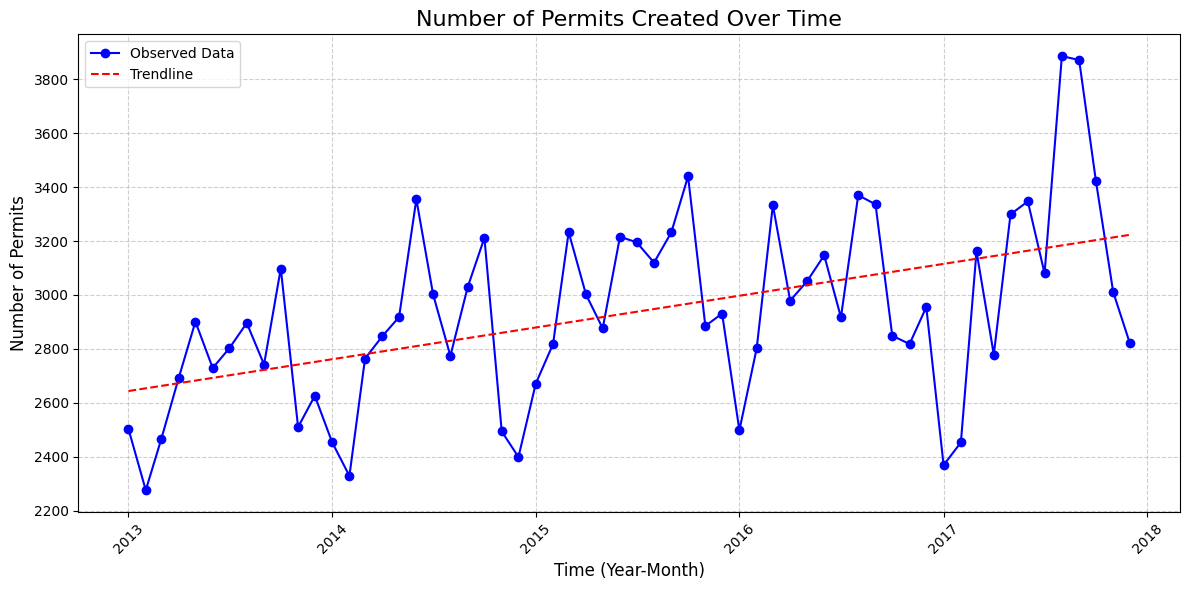

In [109]:
# aggregate data by month
df['year_month'] = df['permit_creation_date'].dt.to_period('M')  # Group by year and month
permits_by_month = df.groupby('year_month').size()

# convert to a datetime index for plotting
permits_by_month.index = permits_by_month.index.to_timestamp()

# extract the x-values (timestamps) and y-values (permit counts)
x = permits_by_month.index.astype(int) / 10**9  # convert datetime to Unix timestamp for regression
y = permits_by_month.values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = slope * x + intercept # trendline

# graph trendline and number of permits
plt.figure(figsize=(12, 6))
plt.plot(permits_by_month.index, permits_by_month.values, marker='o', linestyle='-', color='b', label="Observed Data")
plt.plot(permits_by_month.index, trendline, linestyle='--', color='r', label="Trendline")
plt.title("Number of Permits Created Over Time", fontsize=16)
plt.xlabel("Time (Year-Month)", fontsize=12)
plt.ylabel("Number of Permits", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

How do the number of permits vary by months?

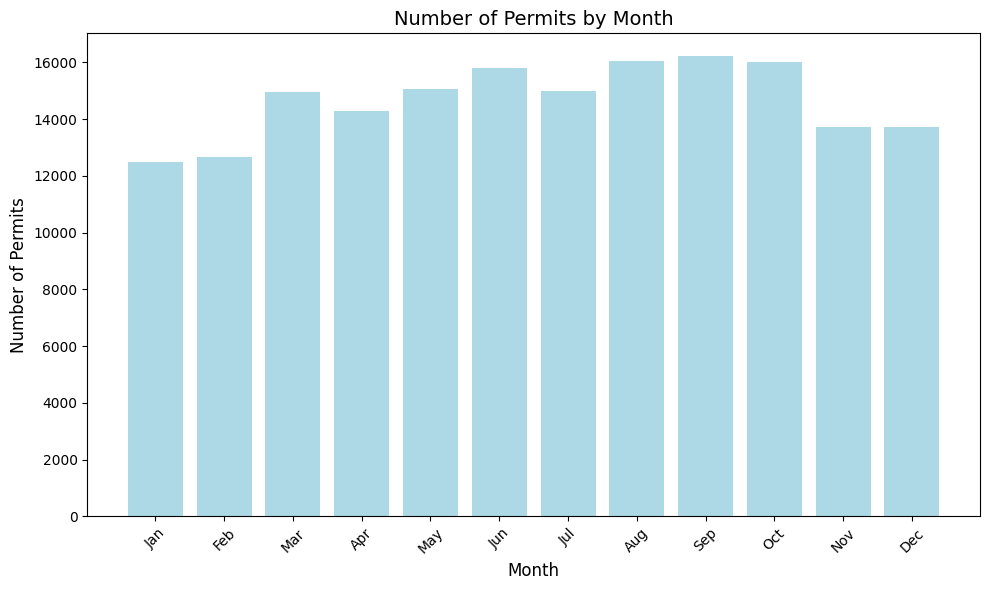

In [ ]:
# extract the month from the 'permit_creation_date'
df['month'] = df['permit_creation_date'].dt.month

# group by month and count number of permits
permits_by_month = df['month'].value_counts().sort_index()

# graph it
plt.figure(figsize=(10, 6))
plt.bar(permits_by_month.index, permits_by_month.values, color='lightblue')
plt.title("Number of Permits by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Permits", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.tight_layout()
plt.show()

## Graphing: existing_use column

existing_use_category
Residential                      94938
Commercial                       36504
Uncategorized                    36474
Entertainment/Recreation          2570
Public/Community Services         2084
Specialty/Other                   1882
Industrial                         852
Transportation/Infrastructure      689
Name: count, dtype: int64


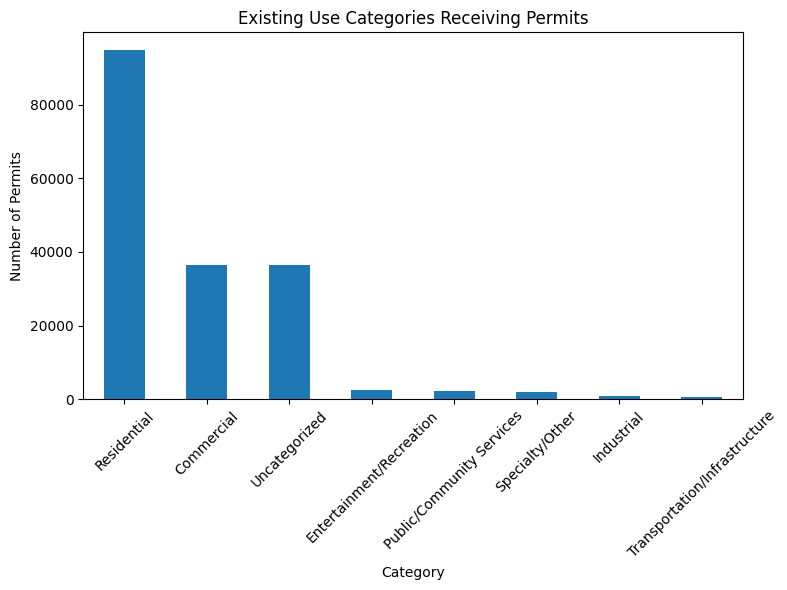

In [110]:
# group by 'existing_use_category' and count permits
top_categories_existing = df['existing_use_category'].value_counts()

# print values to double check
print(top_categories_existing)

# graph it
plt.figure(figsize=(8,6))
top_categories_existing.plot(kind='bar')
plt.title('Existing Use Categories Receiving Permits')
plt.xlabel('Category')
plt.ylabel('Number of Permits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(175993, 38)

In [ ]:
df.head()

,permit_type,permit_type_definition,permit_creation_date,street_number,street_name,street_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,number_of_existing_stories,number_of_proposed_stories,voluntary_soft-story_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,address,existing_use_category,proposed_use_category
0,4,sign - erect,2015-05-06,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,6.0,NaN,NaN,N,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",140 Ellis St,Entertainment/Recreation,Uncategorized
1,4,sign - erect,2016-04-19,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,7.0,NaN,NaN,N,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",440 Geary St,Entertainment/Recreation,Uncategorized
2,3,additions alterations or repairs,2016-05-27,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,6.0,6.0,NaN,N,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1647 Pacific Av,Commercial,Commercial
3,8,otc alterations permit,2016-11-07,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,2.0,2.0,NaN,N,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1230 Pacific Av,Residential,Residential
4,6,demolitions,2016-11-28,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,3.0,NaN,NaN,N,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",950 Market St,Commercial,Uncategorized


## Graphing: proposed_use column

proposed_use_category
Residential                      97190
Uncategorized                    38057
Commercial                       33816
Entertainment/Recreation          2593
Public/Community Services         2255
Industrial                         854
Specialty/Other                    773
Transportation/Infrastructure      455
Name: count, dtype: int64


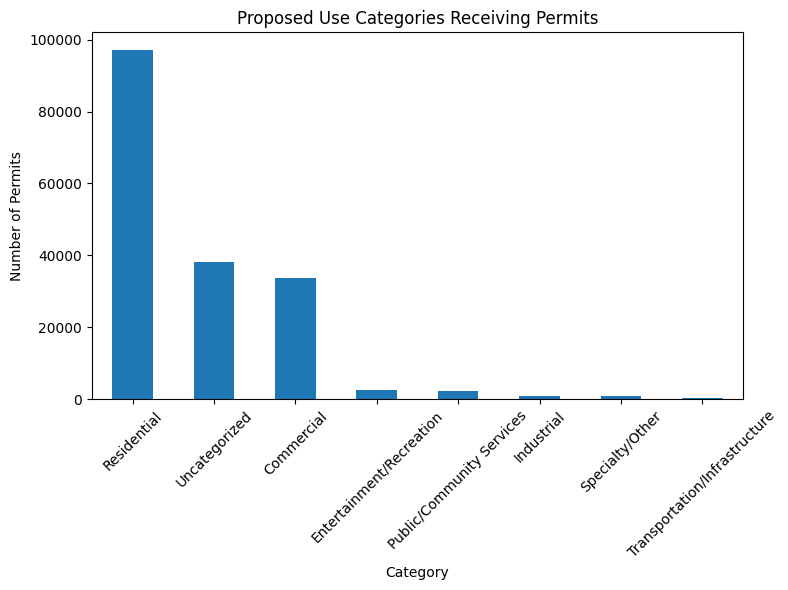

In [111]:
# group by 'proposed_use_category' and count number of permits
top_categories_proposed= df['proposed_use_category'].value_counts()

# print values to double check
print(top_categories_proposed)

# graph it
plt.figure(figsize=(8,6))
top_categories_proposed.plot(kind='bar')
plt.title('Proposed Use Categories Receiving Permits')
plt.xlabel('Category')
plt.ylabel('Number of Permits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Graphing the socioeconomic classes by categories

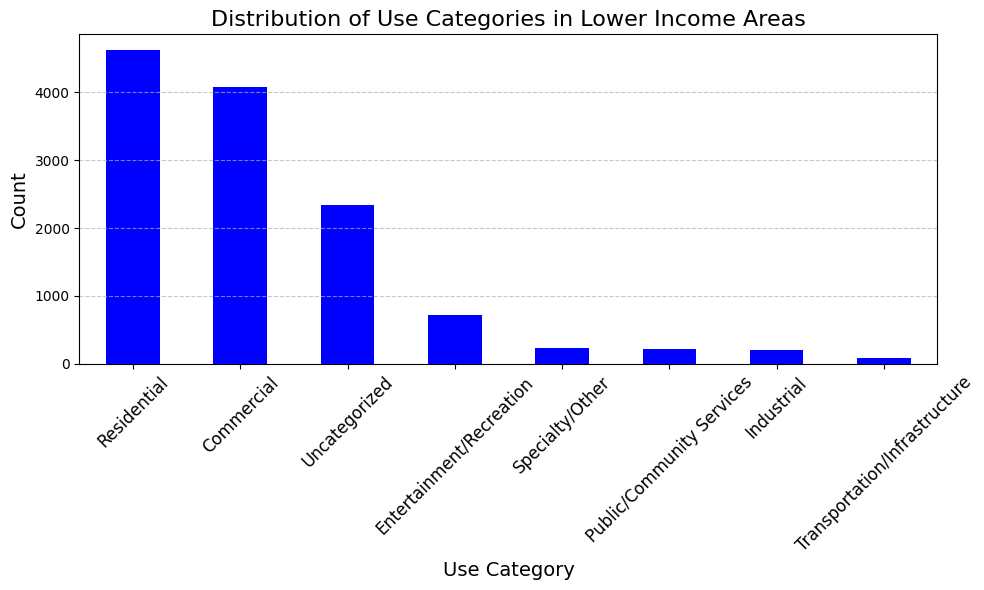

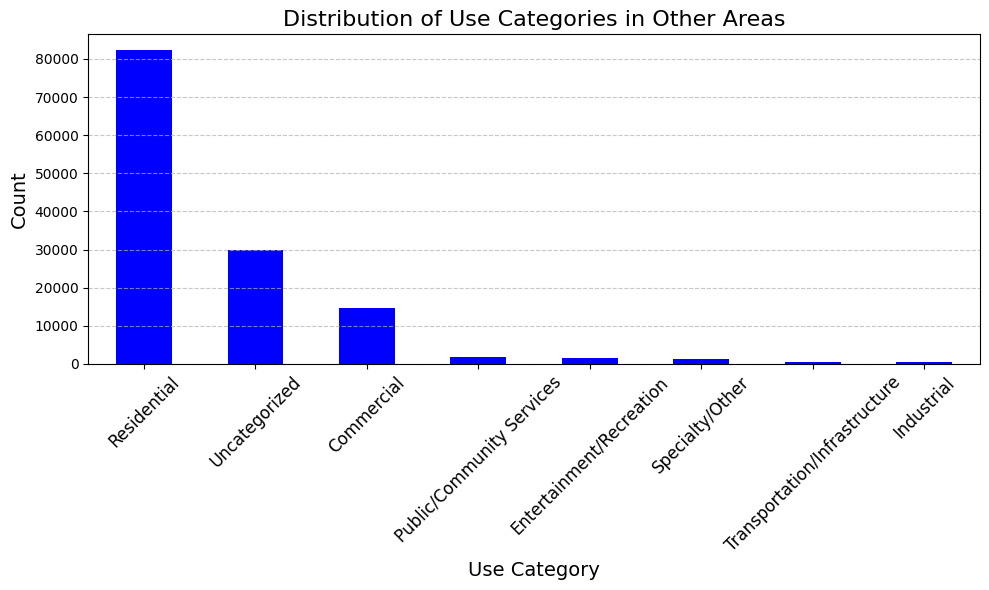

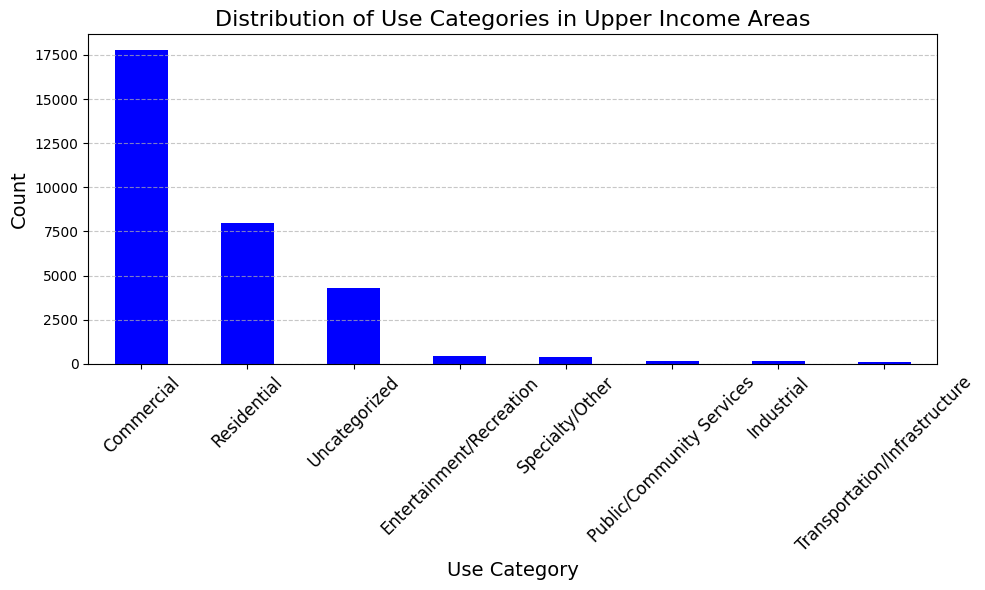

In [80]:
# loop through each socioeconomic class and create a separate graph
for soc_class in df['socioeconomic_class'].unique():
    # filter data for the current socioeconomic class
    class_data = df[df['socioeconomic_class'] == soc_class]

    # group by use_category and count the occurrences
    class_counts = class_data['existing_use_category'].value_counts()

    # graph
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar', color='blue')
    plt.title(f'Distribution of Use Categories in {soc_class} Areas', fontsize=16)
    plt.xlabel('Use Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [83]:
df['socioeconomic_class'].unique()

array(['Lower Income', 'Other', 'Upper Income'], dtype=object)

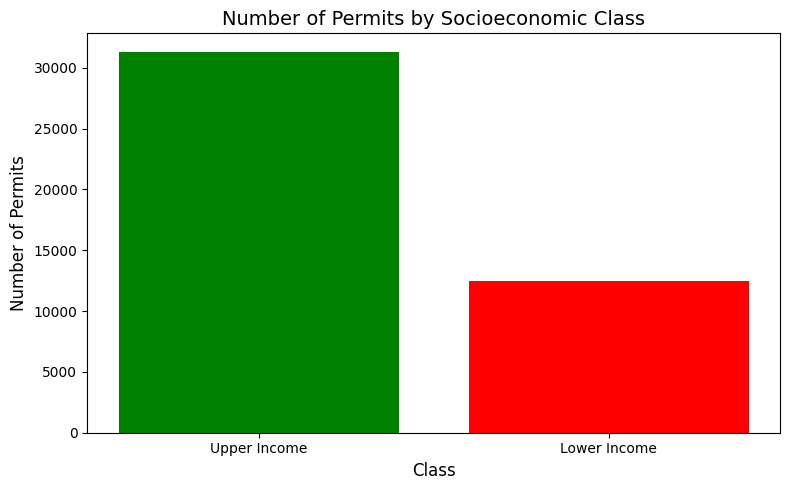

In [112]:
# group by the 'socioeconomic_class' column, excluding "Other", and count number of permits
permits_by_class = df[df['socioeconomic_class'] != 'Other']['socioeconomic_class'].value_counts()

# assign colors
colors = ['green' if cls == 'Upper Income' else 'red' for cls in permits_by_class.index]

# graph it
plt.figure(figsize=(8, 5))
plt.bar(permits_by_class.index, permits_by_class.values, color=colors)
plt.title("Number of Permits by Socioeconomic Class", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Permits", fontsize=12)
plt.tight_layout()
plt.show()

How do the numbers of residential & commerical building permits vary in each neighborhood in the upper and lower class?

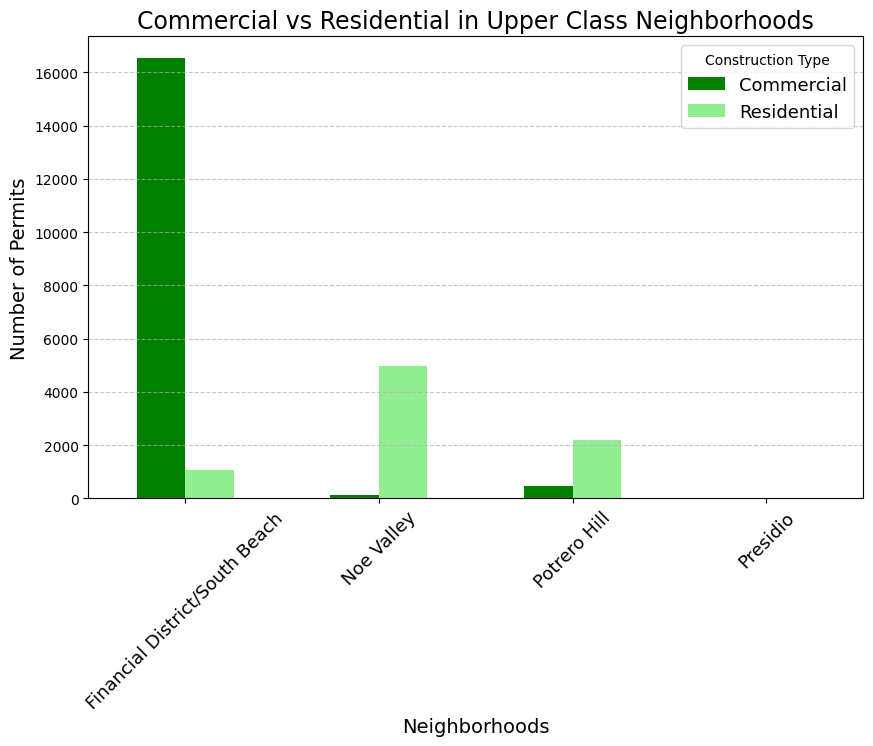

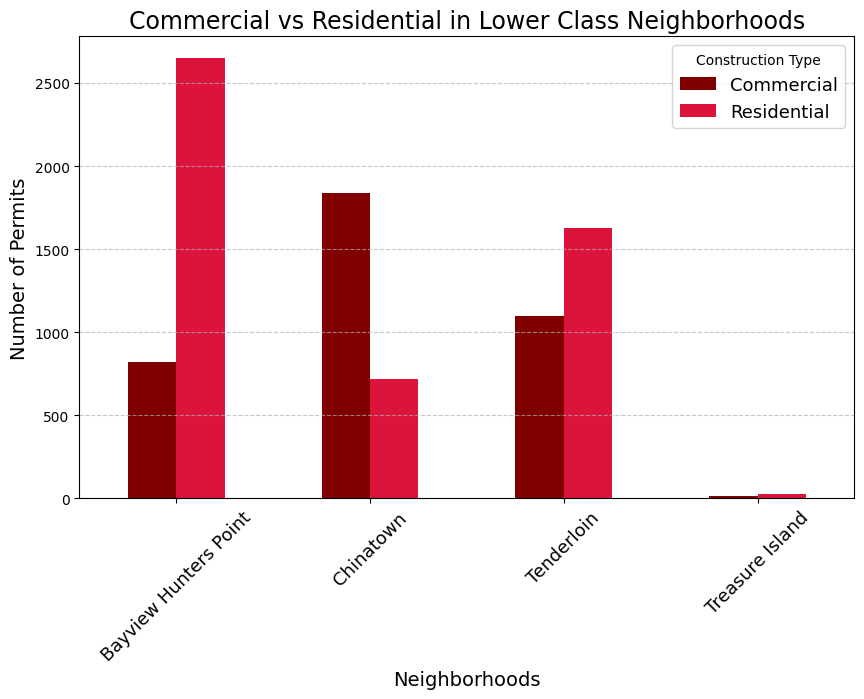

In [100]:
# plot Commercial vs Residential construction by neighborhood
def plot_construction_types(df, income_class, title, color1, color2):
    # filter for the given income class and permit type
    income_df = df[df["socioeconomic_class"] == income_class]

    # count construction types per neighborhood using 'proposed_use_category'
    construction_counts = income_df.groupby(
        ["neighborhoods_-_analysis_boundaries", "proposed_use_category"]
    ).size().unstack(fill_value=0)  # fill missing values with 0

    # filter for Residential and Commercial
    construction_counts = construction_counts.reindex(columns=["Commercial", "Residential"], fill_value=0)

    # graph it
    construction_counts.plot(kind='bar', figsize=(10, 6), color=[color1, color2])
    plt.title(title, fontsize=17)
    plt.xlabel("Neighborhoods", fontsize=14)
    plt.ylabel("Number of Permits", fontsize=14)
    plt.xticks(rotation=45, fontsize=13)
    plt.legend(title="Construction Type", fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# upper income construction
plot_construction_types(df, "Upper Income", "Commercial vs Residential in Upper Class Neighborhoods", "green", "lightgreen")

# lower income construction
plot_construction_types(df, "Lower Income", "Commercial vs Residential in Lower Class Neighborhoods", "maroon", "crimson")


# Analyzing & Graphing Costs: Revised & Estimated

In [114]:
# extract year from permit_creation_date
df['year'] = df['permit_creation_date'].dt.year

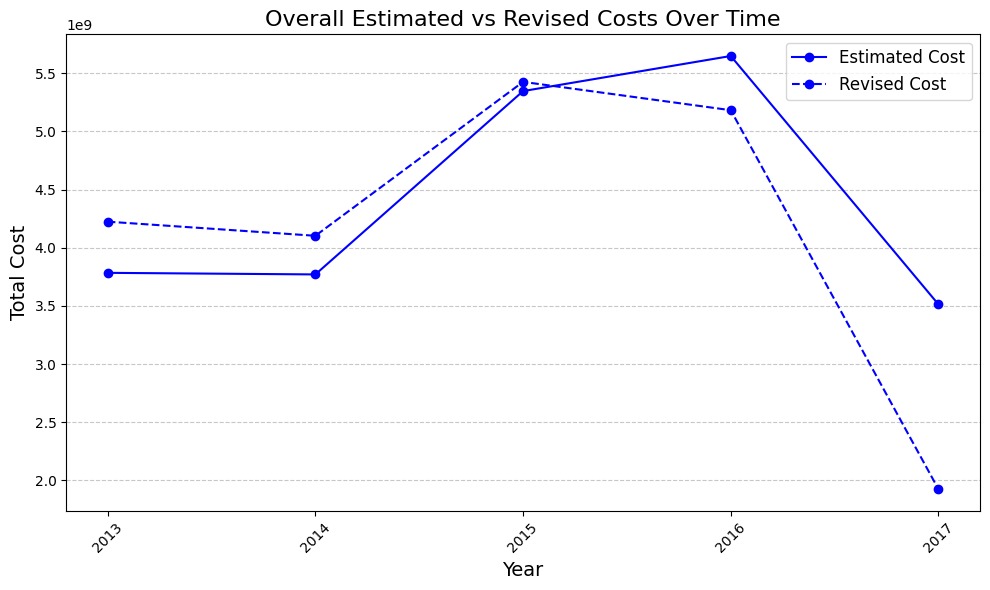

In [ ]:
# group by year & calculate the sum of costs
yearly_costs = df.groupby('year')[['estimated_cost', 'revised_cost']].sum().reset_index()


# plot estimated and revised costs over time
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better readability
plt.plot(yearly_costs['year'], yearly_costs['estimated_cost'], label='Estimated Cost', marker='o', linestyle='-', color = 'blue')
plt.plot(yearly_costs['year'], yearly_costs['revised_cost'], label='Revised Cost', marker='o', linestyle='--', color = 'blue')

# graph it
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cost', fontsize=14)
plt.title('Overall Estimated vs Revised Costs Over Time', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(yearly_costs['year'], rotation=45)
plt.tight_layout()
plt.show()

In [120]:
high_income = df[df['socioeconomic_class'] == 'Upper Income']
low_income = df[df['socioeconomic_class'] == 'Lower Income']

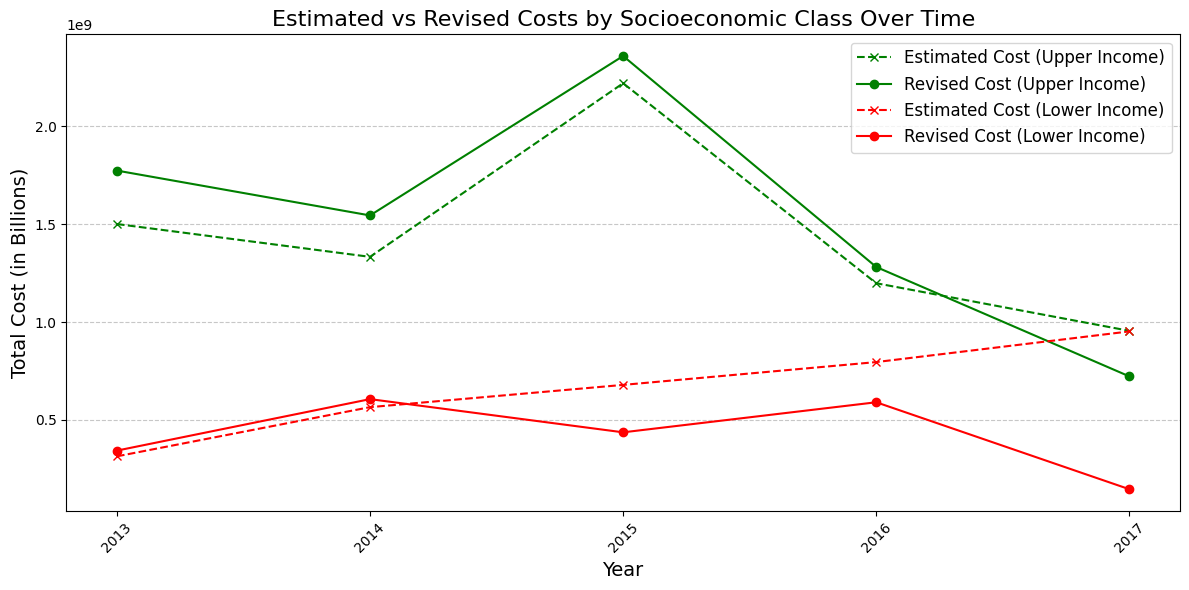

In [121]:
# group by year and calculate the sum of costs for each class
high_income_yearly_costs = high_income.groupby('year')[['estimated_cost', 'revised_cost']].sum().reset_index()
low_income_yearly_costs = low_income.groupby('year')[['estimated_cost', 'revised_cost']].sum().reset_index()

# plot estimated and revised costs for high-income neighborhoods
plt.figure(figsize=(12, 6))
plt.plot(
    high_income_yearly_costs['year'],
    high_income_yearly_costs['estimated_cost'],
    label='Estimated Cost (Upper Income)',
    marker='x',
    linestyle='--',
    color = 'green'
)
plt.plot(
    high_income_yearly_costs['year'],
    high_income_yearly_costs['revised_cost'],
    label='Revised Cost (Upper Income)',
    marker='o',
    linestyle='-',
    color = 'green'
)

# plot estimated and revised costs for low-income neighborhoods
plt.plot(
    low_income_yearly_costs['year'],
    low_income_yearly_costs['estimated_cost'],
    label='Estimated Cost (Lower Income)',
    marker='x',
    linestyle='--',
    color = 'red'
)
plt.plot(
    low_income_yearly_costs['year'],
    low_income_yearly_costs['revised_cost'],
    label='Revised Cost (Lower Income)',
    marker='o',
    linestyle='-',
    color = 'red'
)

# graph it
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cost (in Billions)', fontsize=14)
plt.title('Estimated vs Revised Costs by Socioeconomic Class Over Time', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(high_income_yearly_costs['year'], rotation=45)

plt.tight_layout()
plt.show()

## Estimated vs. Revised Costs by Permit Category (Socioeconomic Class)

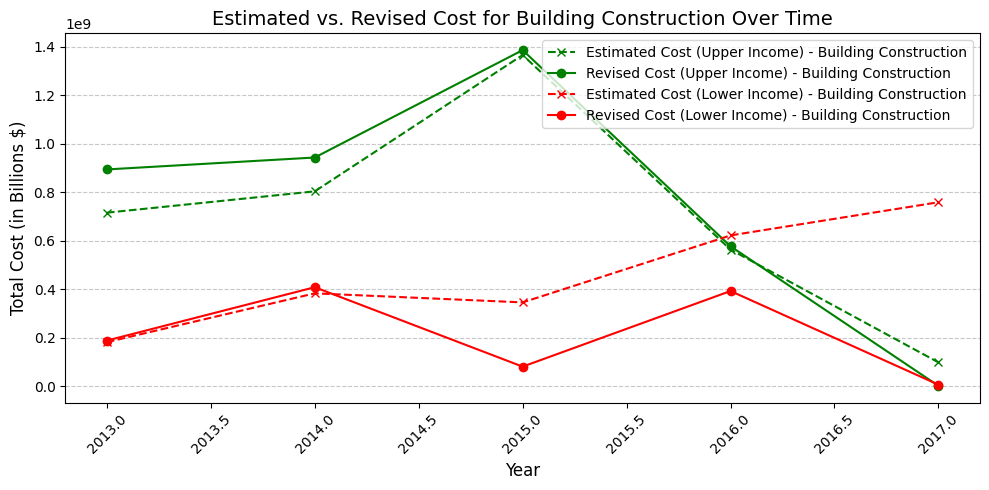

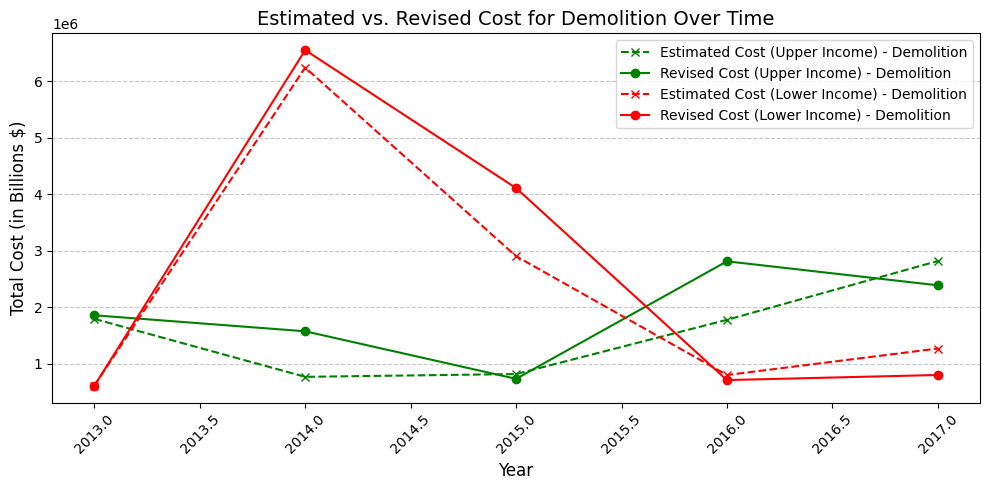

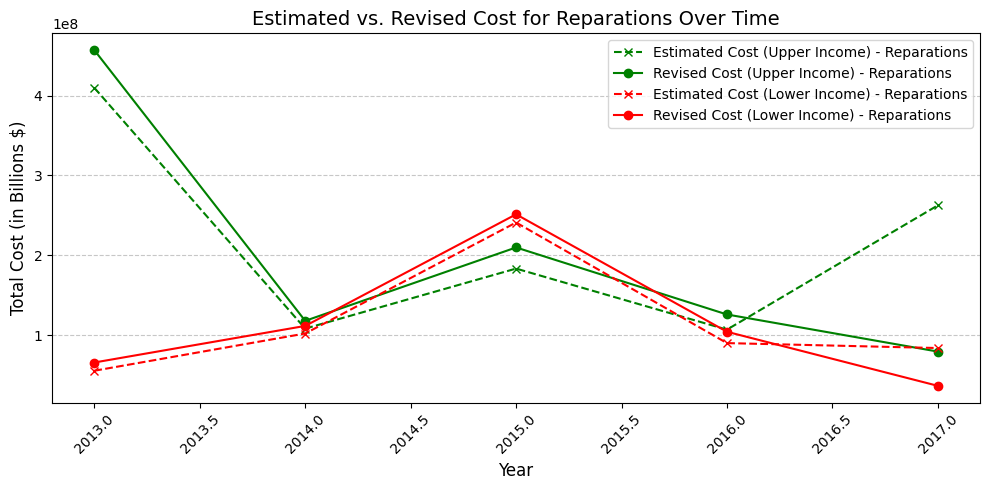

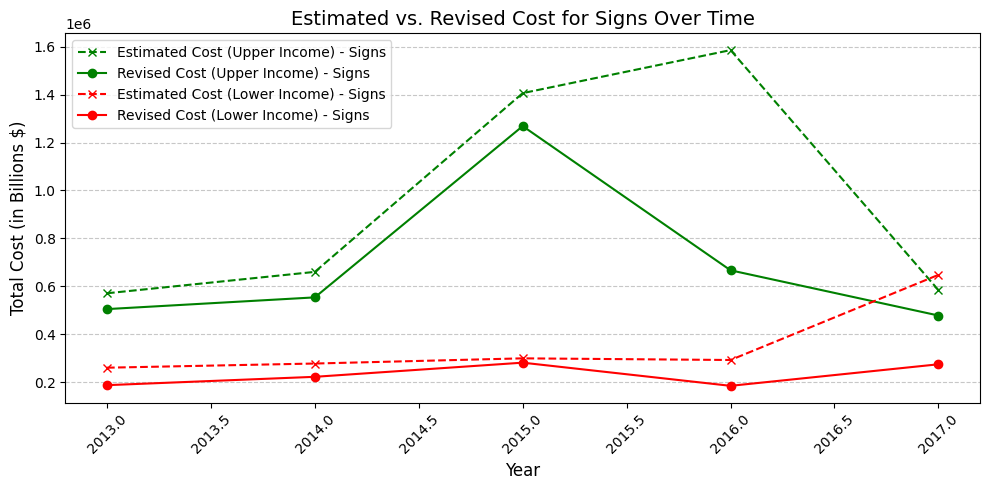

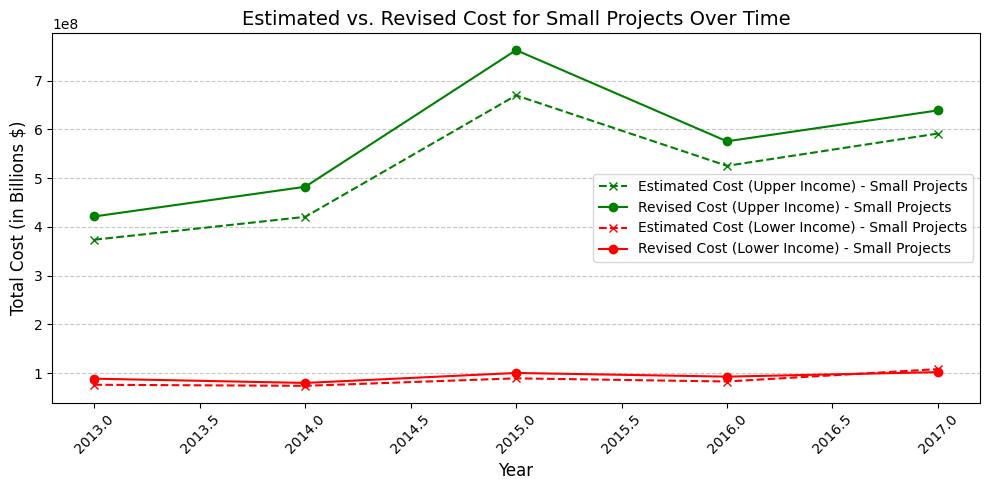

In [122]:
# group by year and permit category to sum estimated and revised costs
upper_income_costs = high_income.groupby(['year', 'permit_category'])[['estimated_cost', 'revised_cost']].sum().unstack(fill_value=0)
lower_income_costs = low_income.groupby(['year', 'permit_category'])[['estimated_cost', 'revised_cost']].sum().unstack(fill_value=0)

# get all unique permit categories
all_permit_categories = upper_income_costs.columns.get_level_values(1).unique()

# plot each permit category separately
for category in all_permit_categories:
    plt.figure(figsize=(10, 5))

    # graph estimated cost for upper
    plt.plot(
        upper_income_costs.index,
        upper_income_costs[('estimated_cost', category)],
        label=f'Estimated Cost (Upper Income) - {category}',
        marker='x',
        linestyle='--',
        color='green'
    )

    # graph revised cost for upper
    plt.plot(
        upper_income_costs.index,
        upper_income_costs[('revised_cost', category)],
        label=f'Revised Cost (Upper Income) - {category}',
        marker='o',
        linestyle='-',
        color='green'
    )

    # graph estimated cost for lower
    plt.plot(
        lower_income_costs.index,
        lower_income_costs[('estimated_cost', category)],
        label=f'Estimated Cost (Lower Income) - {category}',
        marker='x',
        linestyle='--',
        color='red'
    )

    # graph revised cost for lower
    plt.plot(
        lower_income_costs.index,
        lower_income_costs[('revised_cost', category)],
        label=f'Revised Cost (Lower Income) - {category}',
        marker='o',
        linestyle='-',
        color='red'
    )

    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Cost (in Billions $)', fontsize=12)
    plt.title(f'Estimated vs. Revised Cost for {category} Over Time', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

## Average estimated and revised cost in each upper and lower class neighborhoods

<Figure size 1000x600 with 0 Axes>

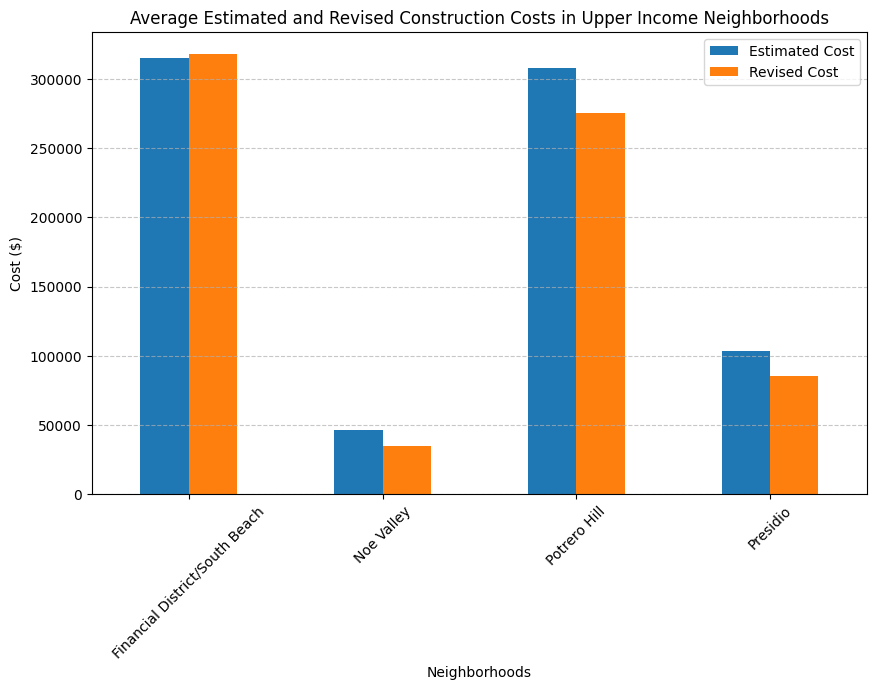

In [124]:
# calculate the average estimated and revised cost for each upper neighborhood
high_avg_costs = high_income.groupby("neighborhoods_-_analysis_boundaries")[
    ["estimated_cost", "revised_cost"]
].mean()

# graph it
plt.figure(figsize=(10, 6))
high_avg_costs.plot(kind='bar', figsize=(10,6))
plt.title("Average Estimated and Revised Construction Costs in Upper Income Neighborhoods")
plt.xlabel("Neighborhoods")
plt.ylabel("Cost ($)")
plt.xticks(rotation=45)
plt.legend(["Estimated Cost", "Revised Cost"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

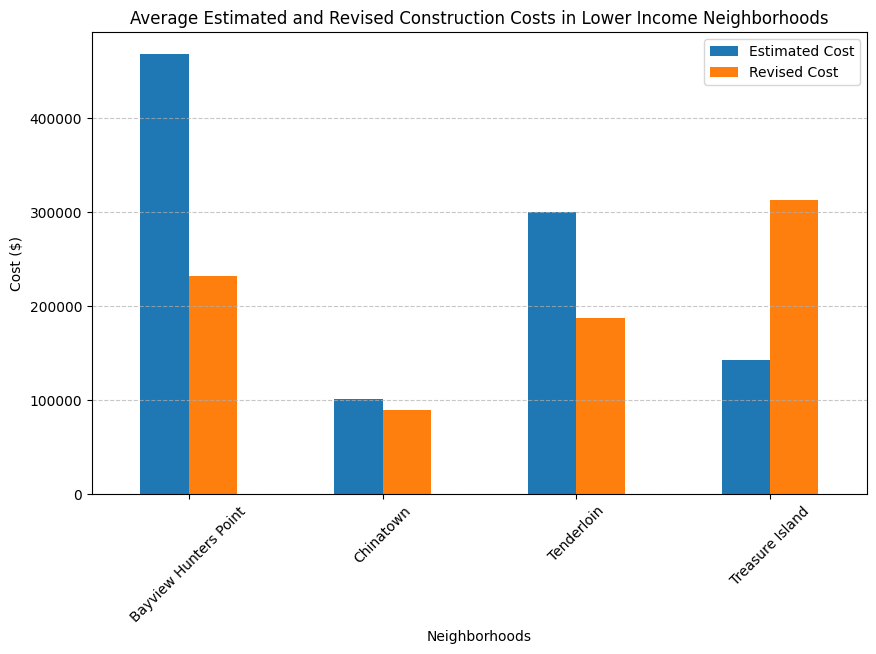

In [123]:
# calculate the average estimated and revised cost for each low neighborhood
low_avg_costs = low_income.groupby("neighborhoods_-_analysis_boundaries")[
    ["estimated_cost", "revised_cost"]
].mean()

# graph it
plt.figure(figsize=(10, 6))
low_avg_costs.plot(kind='bar', figsize=(10,6))
plt.title("Average Estimated and Revised Construction Costs in Lower Income Neighborhoods")
plt.xlabel("Neighborhoods")
plt.ylabel("Cost ($)")
plt.xticks(rotation=45)
plt.legend(["Estimated Cost", "Revised Cost"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Estimated and Revised Cost of Construction

<Figure size 1000x600 with 0 Axes>

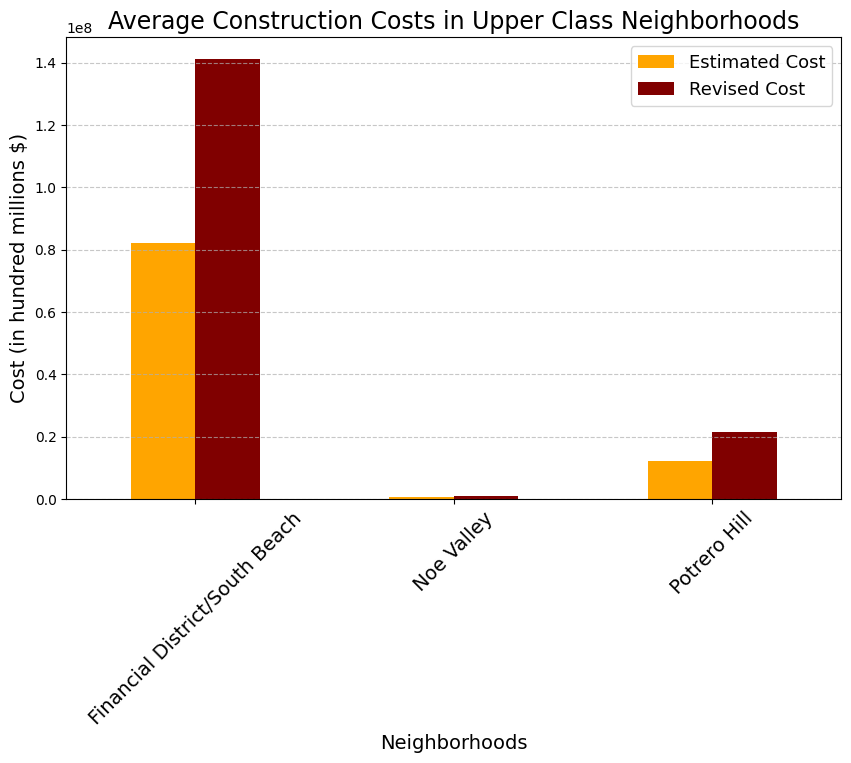

<Figure size 1000x600 with 0 Axes>

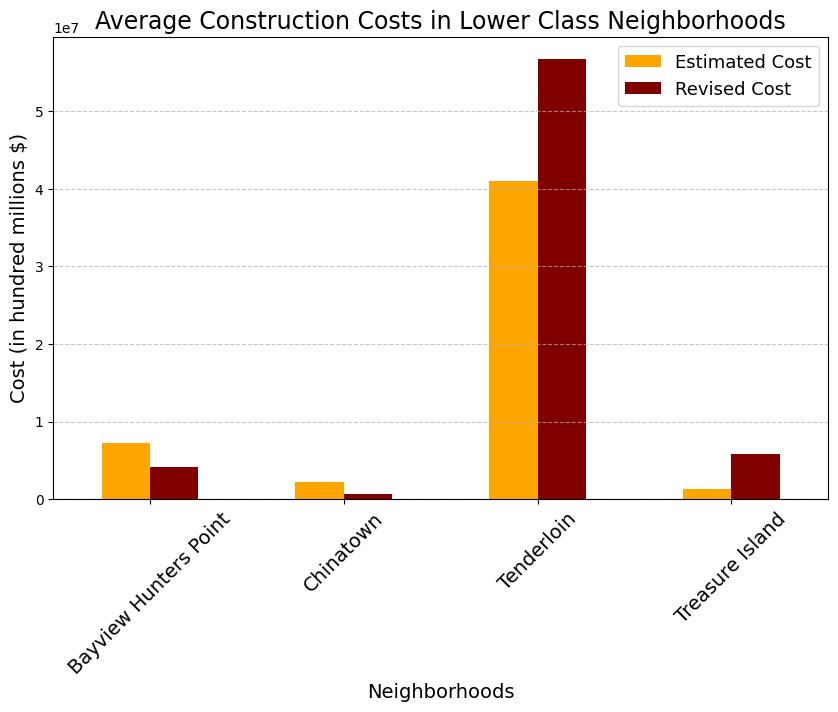

In [96]:
 # function to calculate and plot construction costs by income class
def plot_construction_costs(df, income_class, title, color1, color2):
    # filter for the given income class & building construction permit category
    income_df = df[(df["socioeconomic_class"] == income_class) & (df["permit_category"] == "Building Construction")]

    # calculate the average estimated and revised cost for each neighborhood
    avg_costs = income_df.groupby("neighborhoods_-_analysis_boundaries")[
        ["estimated_cost", "revised_cost"]
    ].mean()

    # graph it
    plt.figure(figsize=(10, 6))
    avg_costs.plot(kind='bar', figsize=(10,6),color=[color1, color2])
    plt.title(title, fontsize=17)
    plt.xlabel("Neighborhoods",fontsize=14)
    plt.ylabel("Cost (in hundred millions $)",fontsize=14)
    plt.xticks(rotation=45, fontsize=14)
    plt.legend(["Estimated Cost", "Revised Cost"],fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# upper neighborhood
plot_construction_costs(df, "Upper Income", "Average Construction Costs in Upper Class Neighborhoods", "orange", "maroon")

# lower neighborhood
plot_construction_costs(df, "Lower Income", "Average Construction Costs in Lower Class Neighborhoods", "orange", "maroon")

# Analyzing & Graphing Permit Category Overtime by Socioeconomic Class

<Figure size 1200x600 with 0 Axes>

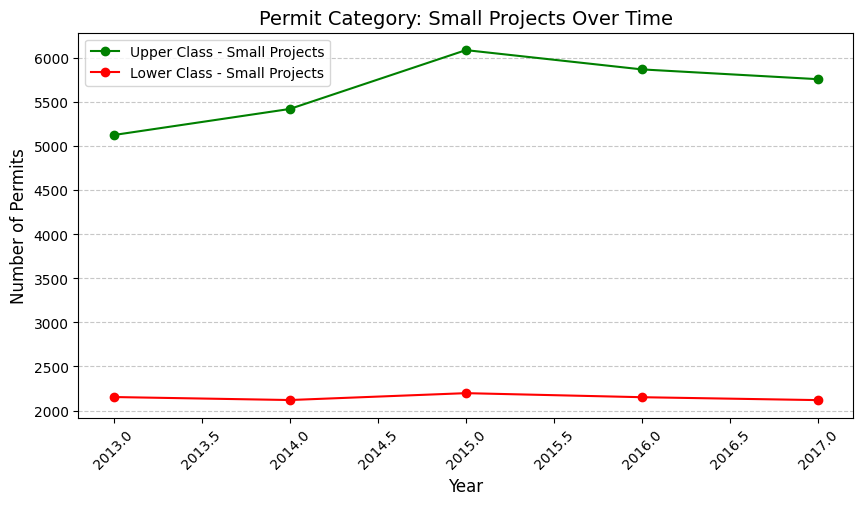

<Figure size 1000x500 with 0 Axes>

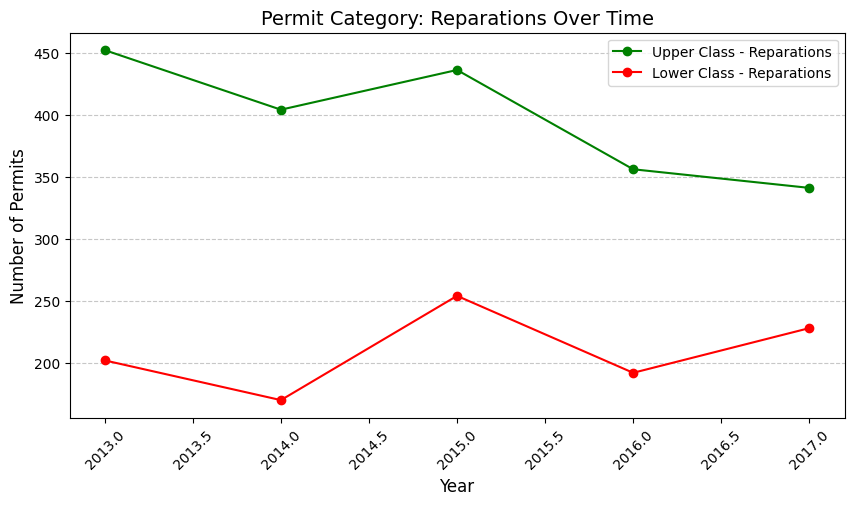

<Figure size 1000x500 with 0 Axes>

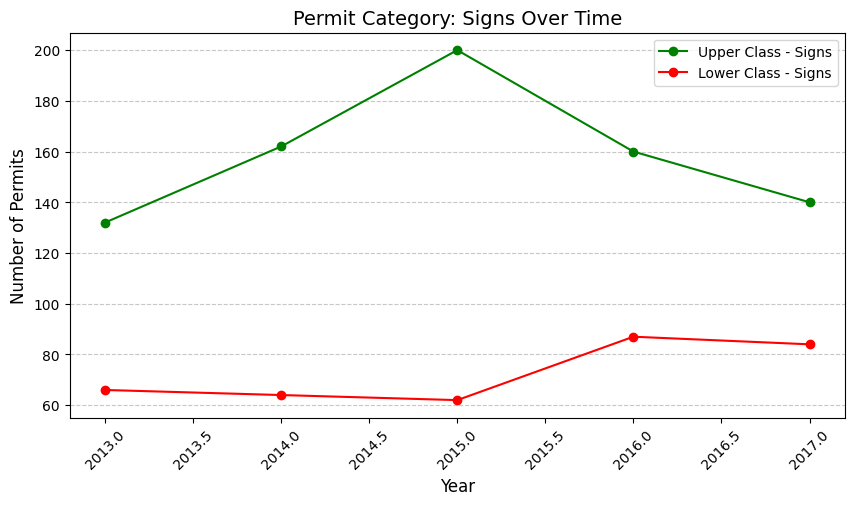

<Figure size 1000x500 with 0 Axes>

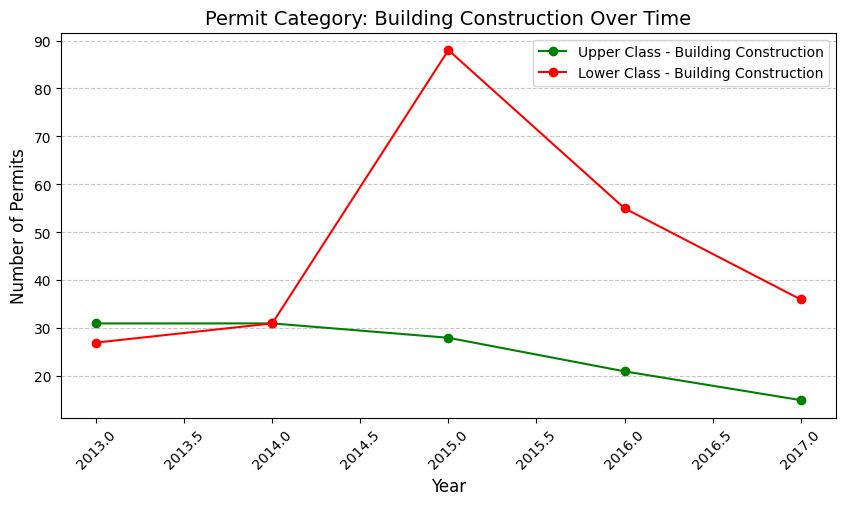

<Figure size 1000x500 with 0 Axes>

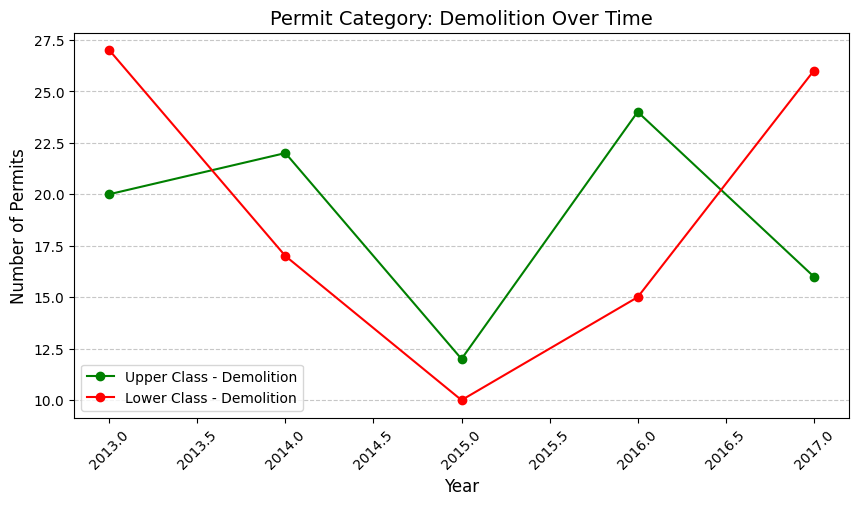

<Figure size 1000x500 with 0 Axes>

In [ ]:
# group by year and permit category to count occurrences
upper_income_counts = high_income.groupby(['year', 'permit_category']).size().unstack(fill_value=0)
lower_income_counts = low_income.groupby(['year', 'permit_category']).size().unstack(fill_value=0)

# top 5 permit categories overall (sum of both income groups)
top_5_permit_categories = (upper_income_counts.sum() + lower_income_counts.sum()).nlargest(5).index

# graph each of the top 5 permit categories separately
plt.figure(figsize=(12, 6))
for category in top_5_permit_categories:
    plt.figure(figsize=(10, 5))

    # graph for upper
    plt.plot(
        upper_income_counts.index,
        upper_income_counts[category],
        label=f'Upper Class - {category}',
        marker='o',
        linestyle='-',
        color = 'green'
    )

    # graph for lower
    plt.plot(
        lower_income_counts.index,
        lower_income_counts[category],
        label=f'Lower Class - {category}',
        marker='o',
        linestyle='-',
        color = 'red'
    )

    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Permits', fontsize=12)
    plt.title(f'Permit Category: {category} Over Time', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    plt.figure(figsize=(10, 5))
    plt.tight_layout()
    plt.show()

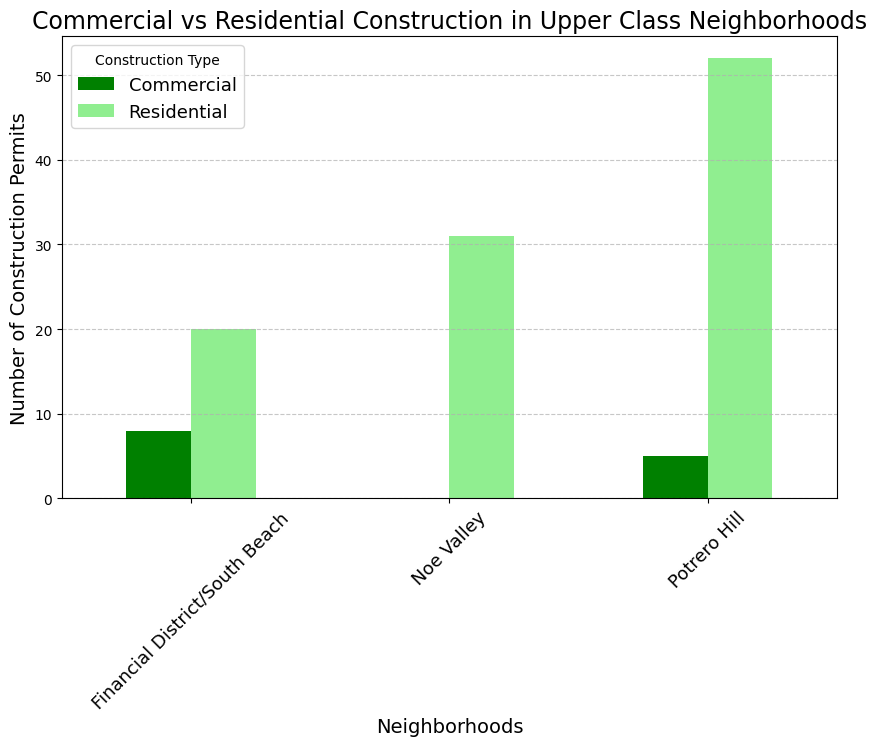

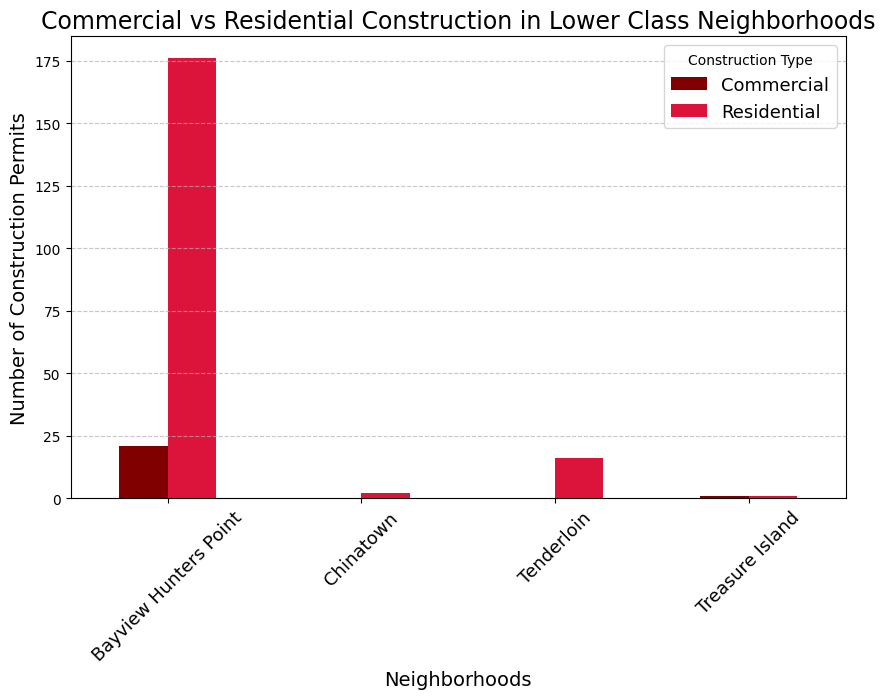

In [101]:
# plot commercial vs residential construction by neighborhood
def plot_construction_types(df, income_class, permit_type, title, color1, color2):
    # Filter for the given income class and permit type
    income_df = df[(df["socioeconomic_class"] == income_class) & (df["permit_category"] == permit_type)]

    # count construction types per neighborhood using 'proposed_use_category'
    construction_counts = income_df.groupby(
        ["neighborhoods_-_analysis_boundaries", "proposed_use_category"]
    ).size().unstack(fill_value=0)  # Fill missing values with 0

    # filter for residential and commercial)
    construction_counts = construction_counts.reindex(columns=["Commercial", "Residential"], fill_value=0)

    # graph it
    construction_counts.plot(kind='bar', figsize=(10, 6), color=[color1, color2])
    plt.title(title, fontsize=17)
    plt.xlabel("Neighborhoods", fontsize=14)
    plt.ylabel("Number of Construction Permits", fontsize=14)
    plt.xticks(rotation=45, fontsize=13)
    plt.legend(title="Construction Type", fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# upper income construction
plot_construction_types(df, "Upper Income", "Building Construction", "Commercial vs Residential Construction in Upper Class Neighborhoods", "green", "lightgreen")

# lower income construction
plot_construction_types(df, "Lower Income", "Building Construction", "Commercial vs Residential Construction in Lower Class Neighborhoods", "maroon", "crimson")


What is the average cost of construction in each neighborhood?

In [125]:
# filter for building construction permits
building_construction_df = df[df["permit_category"] == "Building Construction"]

# calculate the average revised cost by neighborhood and use category for upper and lower neighborhoods
avg_cost = (
    building_construction_df.groupby(["socioeconomic_class", "neighborhoods_-_analysis_boundaries", "proposed_use_category"])["revised_cost"]
    .mean()
    .unstack(fill_value=0)  # missing categories are filled with 0
)

avg_cost

proposed_use_category                                      Commercial  \
socioeconomic_class neighborhoods_-_analysis_boundaries                 
Lower Income        Bayview Hunters Point                4.321785e+06   
                    Chinatown                            0.000000e+00   
                    Tenderloin                           0.000000e+00   
                    Treasure Island                               NaN   
Other               Bernal Heights                       0.000000e+00   
                    Castro/Upper Market                  9.208000e+05   
                    Excelsior                            0.000000e+00   
                    Glen Park                                     NaN   
                    Golden Gate Park                     1.267872e+06   
                    Haight Ashbury                       0.000000e+00   
                    Hayes Valley                         2.000000e+04   
                    Inner Richmond                       0.000000e+00   
                    Inner Sunset                         0.000000e+00   
                    Japantown                            0.000000e+00   
                    Lakeshore                            2.650000e+05   
                    Lone Mountain/USF                    4.850000e+06   
                    Marina                               0.000000e+00   
                    Mission                              2.222500e+06   
                    Mission Bay                          6.259850e+07   
                    Nob Hill                             0.000000e+00   
                    North Beach                          3.500000e+04   
                    Oceanview/Merced/Ingleside           0.000000e+00   
                    Outer Mission                        0.000000e+00   
                    Outer Richmond                       0.000000e+00   
                    Pacific Heights                               NaN   
                    Portola                              0.000000e+00   
                    Presidio Heights                     0.000000e+00   
                    Russian Hill                         0.000000e+00   
                    Seacliff                             0.000000e+00   
                    South of Market                      4.567833e+07   
                    Sunset/Parkside                      0.000000e+00   
                    Twin Peaks                           0.000000e+00   
                    Visitacion Valley                    0.000000e+00   
                    West of Twin Peaks                   7.750000e+05   
                    Western Addition                     5.000000e+05   
Upper Income        Financial District/South Beach       1.353952e+08   
                    Noe Valley                           0.000000e+00   
                    Potrero Hill                         5.013860e+07   

proposed_use_category                                    Entertainment/Recreation  \
socioeconomic_class neighborhoods_-_analysis_boundaries                             
Lower Income        Bayview Hunters Point                               5500000.0   
                    Chinatown                                            650000.0   
                    Tenderloin                                        143982500.0   
                    Treasure Island                                           0.0   
Other               Bernal Heights                                            0.0   
                    Castro/Upper Market                                  800000.0   
                    Excelsior                                                 0.0   
                    Glen Park                                                 0.0   
                    Golden Gate Park                                     505000.0   
                    Haight Ashbury                                            0.0   
                    Hayes Valley                           

# Probability Distribution Modeling Graphs

What is the number of permits predicted a day?

Mean (λ): 140.6818545163869
Variance: 627.0715024780167
Estimated parameters: r = 40.690389429774925, p = 0.22434738934946066


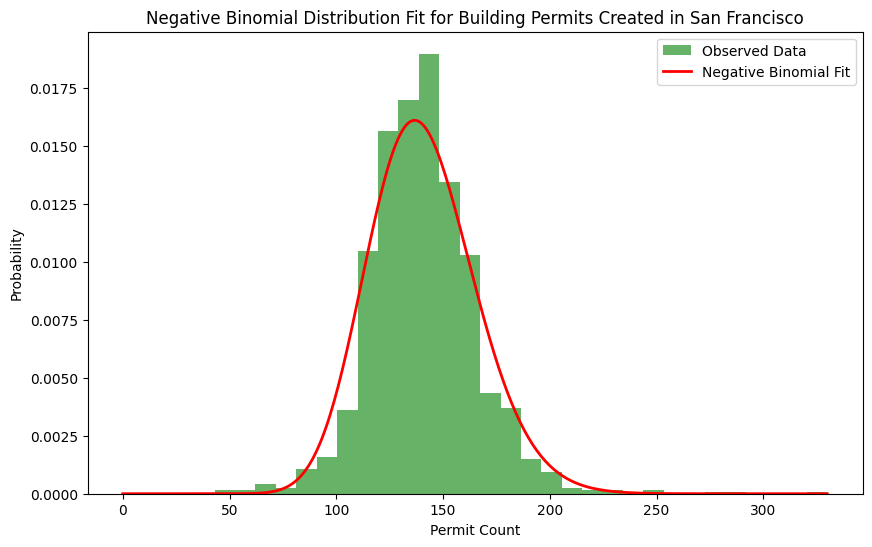

In [106]:
permits_by_day = df.groupby(df['permit_creation_date'].dt.date).size()

# calculate mean and variance
mean_count_all = permits_by_day.mean()
variance_count_all = permits_by_day.var()

print(f"Mean (λ): {mean_count_all}")
print(f"Variance: {variance_count_all}")

# method of moments estimation
p = mean_count_all / variance_count_all # p - probability of success
r = mean_count_all ** 2 / (variance_count_all - mean_count_all) # r - number of successess

print(f"Estimated parameters: r = {r}, p = {p}")

# generate nbinom probabilities
x = np.arange(0, max(permits_by_day) + 1) # trials for the rth success
pmf = nbinom.pmf(x, r, p) # probability mass function

# histogram and fitted distribution (to check)
plt.figure(figsize=(10, 6))
plt.hist(permits_by_day, bins=30, density=True, alpha=0.6, color='g', label="Observed Data")
plt.plot(x, pmf, 'r-', lw=2, label="Negative Binomial Fit")
plt.title("Negative Binomial Distribution Fit for Building Permits Created in San Francisco")
plt.xlabel("Permit Count")
plt.ylabel("Probability")
plt.legend()
plt.show()

Repeat for upper class

Mean (λ): 25.001598721023182
Variance: 49.091197442046365
Estimated parameters: r = 25.94812582168734, p = 0.509288834327953


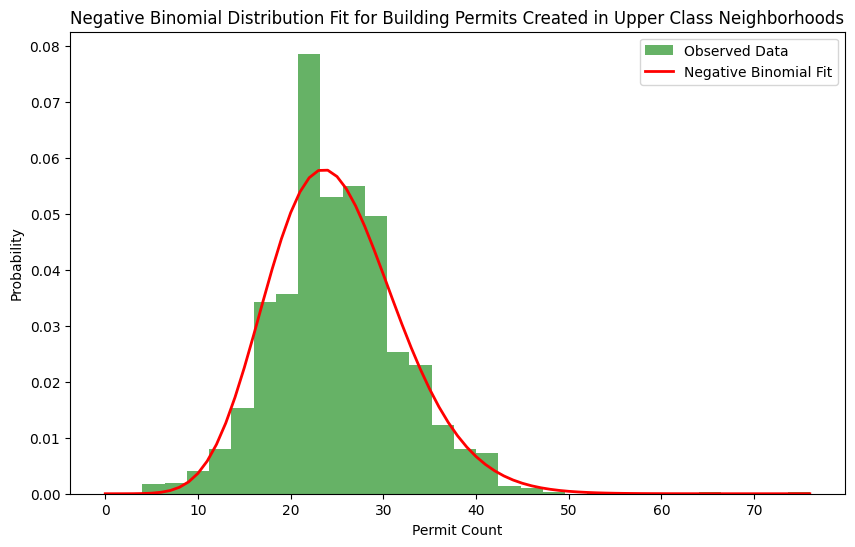

In [107]:
# calculate daily counts in upper class
daily_counts_up = high_income.groupby(high_income['permit_creation_date'].dt.date).size()

# mean and variance
mean_count_up = daily_counts_up.mean()
variance_count_up = daily_counts_up.var()

print(f"Mean (λ): {mean_count_up}")
print(f"Variance: {variance_count_up}")

# method of moments estimation
p = mean_count_up / variance_count_up # p - probability of success
r = mean_count_up ** 2 / (variance_count_up - mean_count_up) # r - number of successes

print(f"Estimated parameters: r = {r}, p = {p}")

x = np.arange(0, max(daily_counts_up) + 1) # trials for the rth success
pmf = nbinom.pmf(x, r, p) # probability mass function

# histogram and fitted distribution (to check)
plt.figure(figsize=(10, 6))
plt.hist(daily_counts_up, bins=30, density=True, alpha=0.6, color='g', label="Observed Data")
plt.plot(x, pmf, 'r-', lw=2, label="Negative Binomial Fit")
plt.title("Negative Binomial Distribution Fit for Building Permits Created in Upper Class Neighborhoods")
plt.xlabel("Permit Count")
plt.ylabel("Probability")
plt.legend()
plt.show()

Repeat for lower class

Mean (λ): 9.9832
Variance: 24.36240768614894
Estimated parameters: r = 6.931138656269887, p = 0.4097788744285677


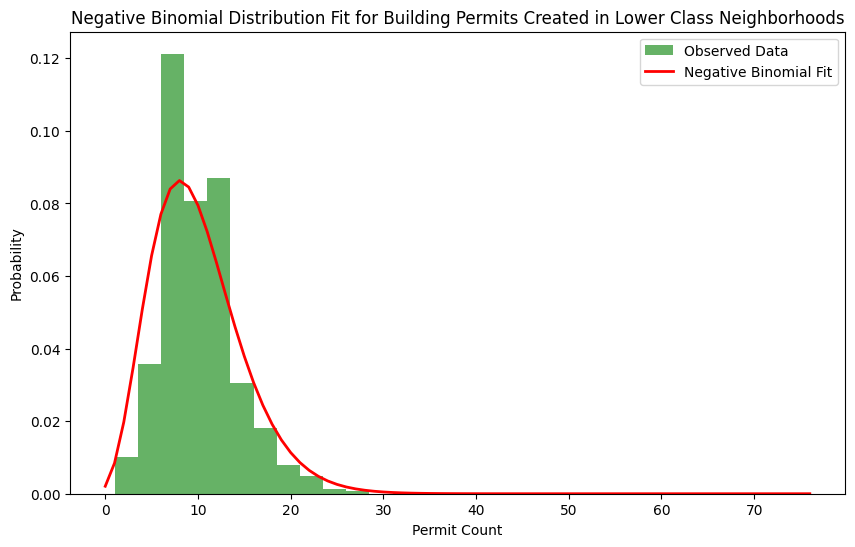

In [108]:
# calculate daily counts in lower class
daily_counts_low = low_income.groupby(low_income['permit_creation_date'].dt.date).size()

# mean and variance
mean_count_low  = daily_counts_low .mean()
variance_count_low  = daily_counts_low .var()

print(f"Mean (λ): {mean_count_low }")
print(f"Variance: {variance_count_low }")

# method of moments estimation
p = mean_count_low  / variance_count_low # p - probability of success
r = mean_count_low  ** 2 / (variance_count_low  - mean_count_low ) # r - number of successes

print(f"Estimated parameters: r = {r}, p = {p}")

x = np.arange(0, max(daily_counts_low) + 1) # trials for the rth success
pmf = nbinom.pmf(x, r, p) # probability mass function

# histogram and fitted distribution (to check)
plt.figure(figsize=(10, 6))
plt.hist(daily_counts_low, bins=30, density=True, alpha=0.6, color='g', label="Observed Data")
plt.plot(x, pmf, 'r-', lw=2, label="Negative Binomial Fit")
plt.title("Negative Binomial Distribution Fit for Building Permits Created in Lower Class Neighborhoods")
plt.xlabel("Permit Count")
plt.ylabel("Probability")
plt.legend()
plt.show()